# About Dataset

Features:
fraud_bool (boolean) = (1 if fraud, 0 if legit).

income (numeric) = Annual income of the applicant in quantiles. Ranges between [0, 1].

name_email_similarity (numeric) = Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges

prev_address_months_count (numeric) = Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [-1, 380] months (-1 is a missing value).

current_address_months_count (numeric) = Months in currently registered address of the applicant. Ranges between [-1, 429] months (-1 is a missing value).

customer_age (numeric) = Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). Ranges between [10, 90] years.

days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [–16, 114] (negatives are missing values).

payment_type (categorical): Credit payment plan type. 5 possible (anonymized) values.

zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [–175, 16818].

velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].

velocity_4w (numeric): Velocity of total applications made in last 4 weeks i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

employment_status (categorical): Employment status of the applicant. 7 possible (anonymized) values.

credit_risk_score (numeric): Internal score of application risk. Ranges between [–191, 389].

email_is_free (binary): Domain of application email (either free or paid).

housing_status (categorical): Current residential status for applicant. 7 possible (anonymized) values.

phone_home_valid (binary): Validity of provided home phone.

phone_mobile_valid (binary): Validity of provided mobile phone.

bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [–1, 32] months (–1 is a missing value).

has_other_cards (binary): If applicant has other cards from the same banking company.

proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

foreign_request (binary): If origin country of request is different from bank’s country.

source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [–1, 107] minutes (–1 is a missing value).

device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

keep_alive_session (binary): User option on session logout.

device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [–1, 2] emails (–1 is a missing value).

device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

month (numeric): Month where the application was made. Ranges between [0, 7].

Link dataset: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter # Untuk menghitung rasio XGBoost
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
sns.set()

In [2]:
df = pd.read_csv("/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv", nrows=200_000)
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.5,0.528804,26,13,20,0.018300,51.504923,AA,2074,...,0,200.0,0,INTERNET,3.871854,other,1,1,0,1
199996,0,0.4,0.079761,137,14,30,4.018075,-0.830555,AC,1577,...,0,200.0,0,INTERNET,5.545133,other,1,1,0,1
199997,0,0.4,0.161715,-1,58,20,0.013512,-1.329180,AB,2810,...,0,200.0,0,INTERNET,4.119012,other,1,1,0,1
199998,0,0.6,0.136501,25,4,20,0.003101,-1.465252,AB,3215,...,0,200.0,0,INTERNET,3.060711,linux,0,1,0,1


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        200000 non-null  int64  
 1   income                            200000 non-null  float64
 2   name_email_similarity             200000 non-null  float64
 3   prev_address_months_count         200000 non-null  int64  
 4   current_address_months_count      200000 non-null  int64  
 5   customer_age                      200000 non-null  int64  
 6   days_since_request                200000 non-null  float64
 7   intended_balcon_amount            200000 non-null  float64
 8   payment_type                      200000 non-null  object 
 9   zip_count_4w                      200000 non-null  int64  
 10  velocity_6h                       200000 non-null  float64
 11  velocity_24h                      200000 non-null  f

In [4]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,0.010630,0.537184,0.496496,16.557660,90.367210,33.392550,9.422854e-01,9.647162,2003.240790,7225.366960,...,0.884425,11.686195,0.183595,567.759700,0.033180,8.189715,0.648550,1.028535,0.0,0.337800
std,0.102553,0.290785,0.286043,44.278904,91.934497,12.327525,4.707124e+00,20.696069,1263.268756,3116.262052,...,0.319715,11.922711,0.387155,544.830232,0.179107,8.679465,0.477424,0.215873,0.0,0.472961
min,0.000000,0.100000,0.000032,-1.000000,-1.000000,10.000000,4.036860e-09,-13.202786,2.000000,-29.235883,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.200000,0.225106,-1.000000,22.000000,20.000000,7.039064e-03,-1.184425,1073.000000,4981.488358,...,1.000000,1.000000,0.000000,200.000000,0.000000,3.469201,0.000000,1.000000,0.0,0.000000
50%,0.000000,0.600000,0.513060,-1.000000,53.000000,30.000000,1.489647e-02,-0.809822,1584.000000,7380.364739,...,1.000000,9.000000,0.000000,200.000000,0.000000,5.341666,1.000000,1.000000,0.0,0.000000
75%,0.000000,0.800000,0.745551,11.000000,142.000000,40.000000,2.593825e-02,14.557498,2693.250000,9051.834391,...,1.000000,25.000000,0.000000,1000.000000,0.000000,9.212150,1.000000,1.000000,0.0,1.000000
max,1.000000,0.900000,0.999999,367.000000,425.000000,90.000000,7.658148e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,1.000000


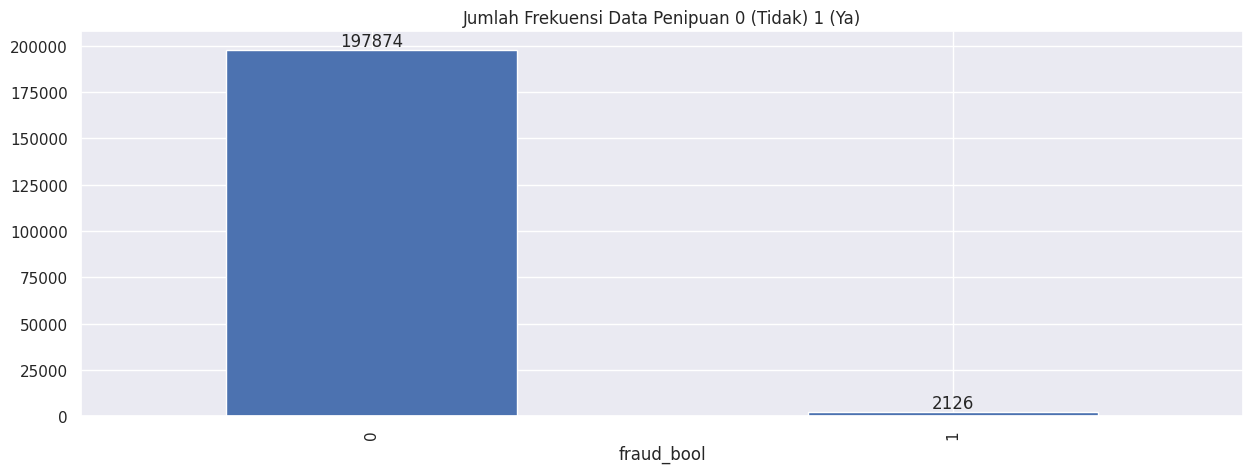

In [5]:
plot = df["fraud_bool"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Data Penipuan 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

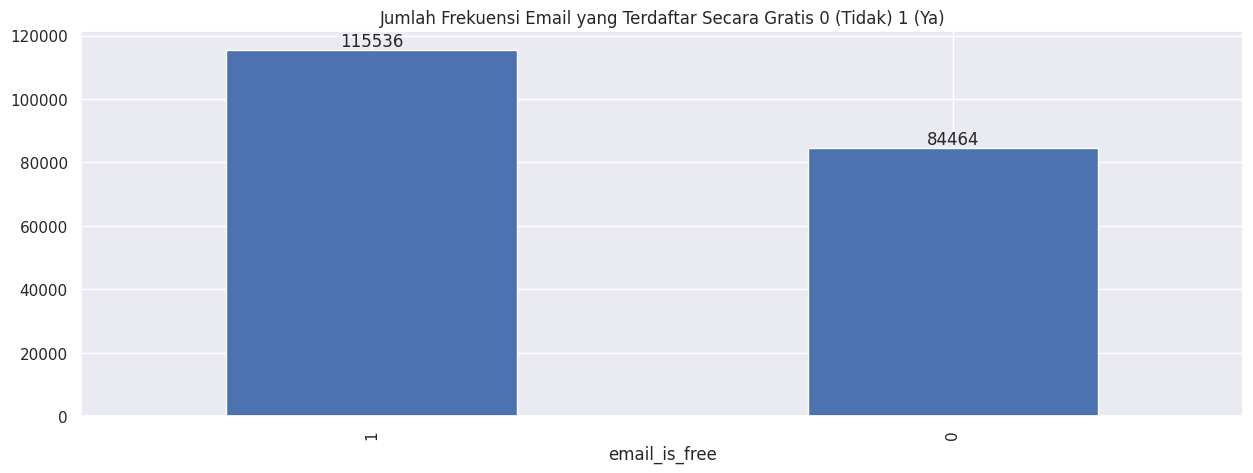

In [6]:
plot = df["email_is_free"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Email yang Terdaftar Secara Gratis 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

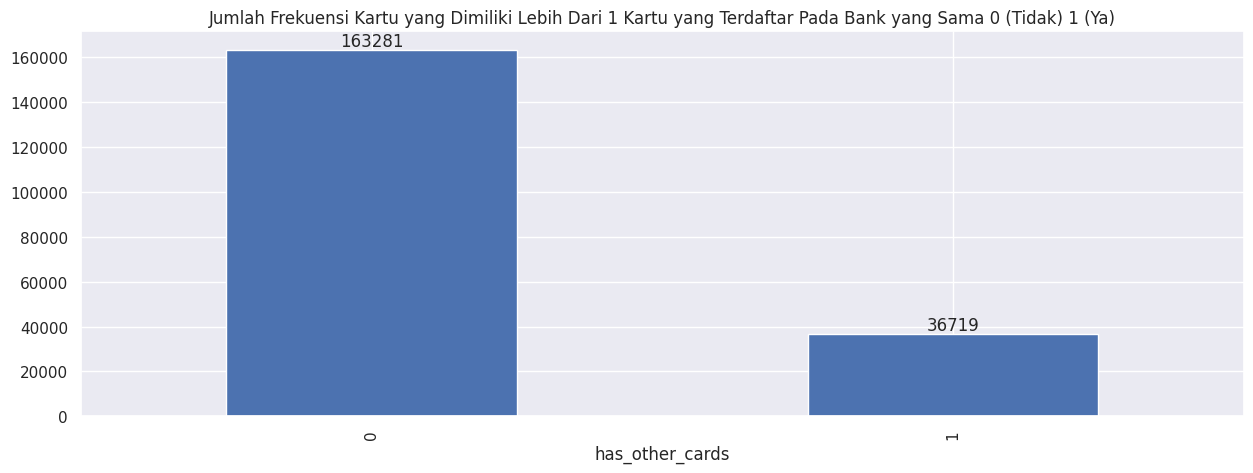

In [7]:
plot = df["has_other_cards"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Kartu yang Dimiliki Lebih Dari 1 Kartu yang Terdaftar Pada Bank yang Sama 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

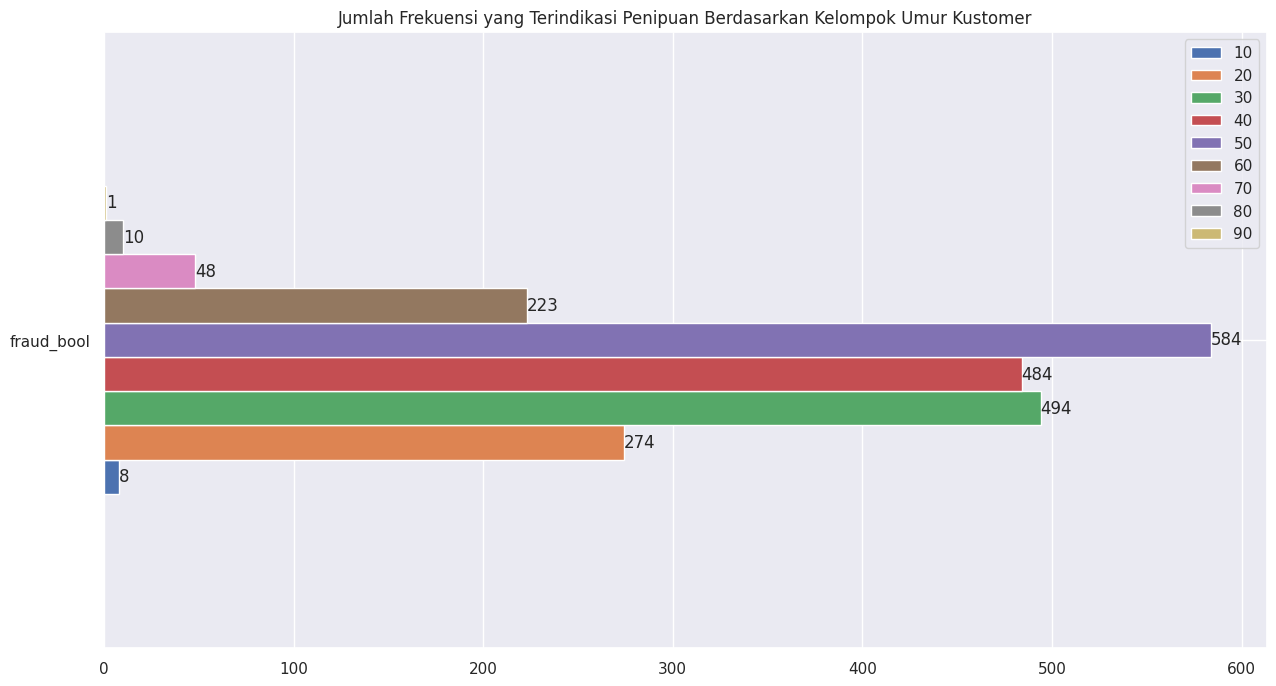

In [8]:
plot = pd.pivot_table(data=df, values="fraud_bool", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Frekuensi yang Terindikasi Penipuan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


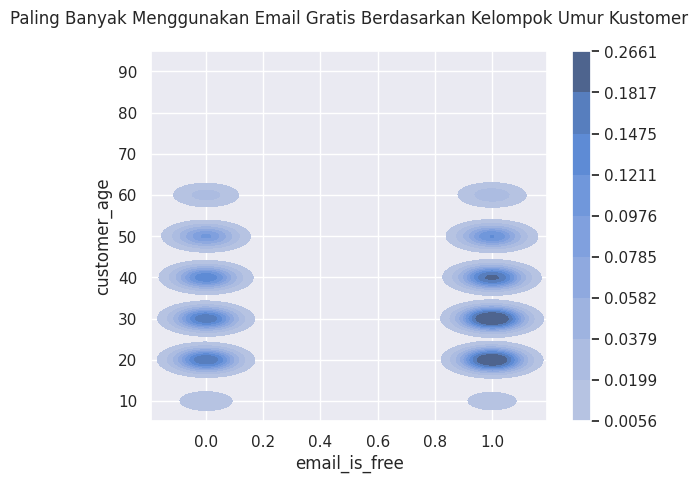

In [9]:
ax = sns.kdeplot(
    data=df,
    x="email_is_free",
    y="customer_age",
    cbar=True,
    fill=True
)
ax.set_title(
    "Paling Banyak Menggunakan Email Gratis Berdasarkan Kelompok Umur Kustomer",
    pad=20  # Atur jarak
)
plt.show()

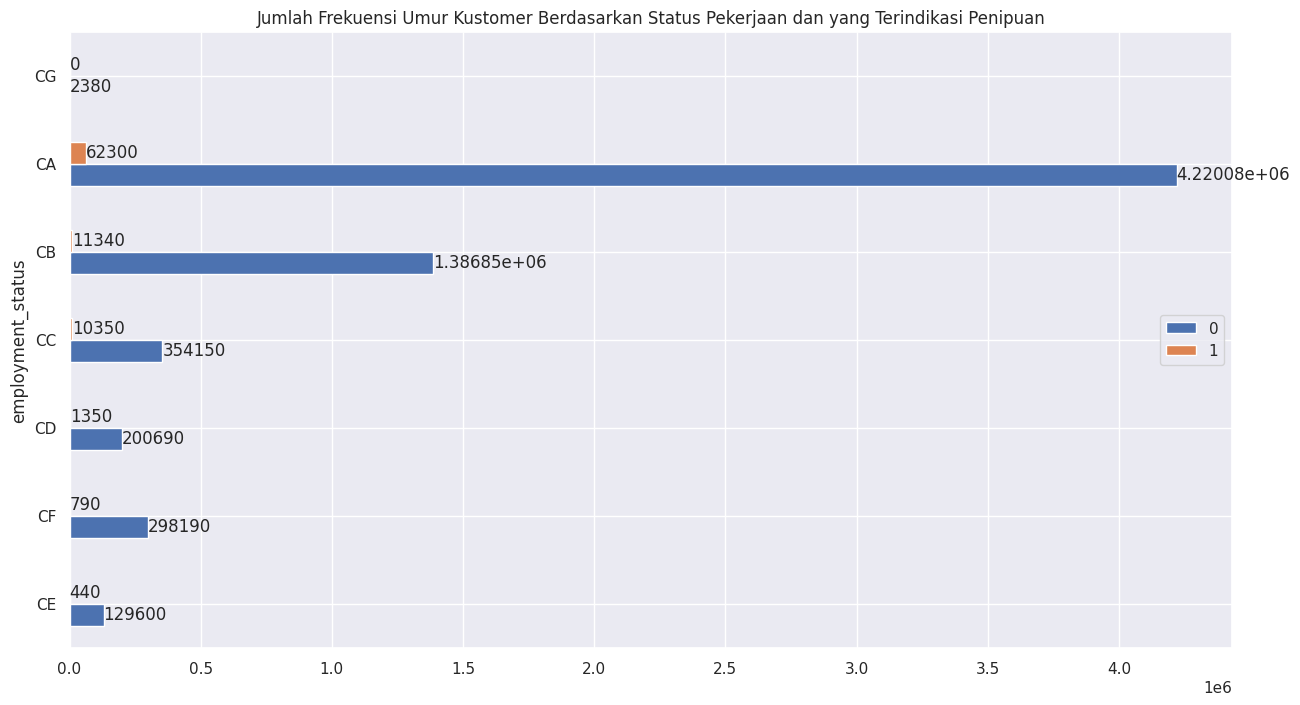

In [10]:
# Mengurutkan berdasarkan fitur fraud_bool 1
plot = df.groupby(["employment_status", "fraud_bool"])["customer_age"].sum().unstack().sort_values(by=1, ascending=True)
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Frekuensi Umur Kustomer Berdasarkan Status Pekerjaan dan yang Terindikasi Penipuan")
ax.legend(loc="center right")

for container in ax.containers:
    ax.bar_label(container)

In [11]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
def print_counts_categorical_features(df):
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        counts = df[col].value_counts(dropna=False)
        counts.plot(kind='bar')
        plt.title(f'Distribusi Frekuensi Kategori: {col}')
        plt.xlabel(col)
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45, ha='right')
        
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)
            
        plt.tight_layout()
        plt.show()

In [ ]:
print_counts_categorical_features(df)

In [ ]:
sns.displot(
    data=df, 
    bins=5, 
    x="customer_age", 
    hue="income", 
    multiple="stack", 
    palette="viridis").set(title="Pendapatan Paling Banyak Berdasarkan Umur Kustomer");

In [ ]:
plot = pd.pivot_table(data=df, values="phone_mobile_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Handphone Valid")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="phone_home_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Rumah Valid")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="days_since_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Melakukan Request Terbanyak Sejak Aplikasi Rilis")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="velocity_24h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 24 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="velocity_4w", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 4 Minggu Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = pd.pivot_table(data=df, values="foreign_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kustomer yang Melakukan Request Diluar Negara Asalnya Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
ax = sns.kdeplot(
    data=df,
    x="customer_age",
    y="velocity_6h",
    cbar=True,
    fill=True
)
ax.set_title(
    "Paling Banyak Melakukan Request 6 Jam Terakhir Berdasarkan Kelompok Umur Kustomer",
    pad=20  # Atur jarak
)
plt.show()

In [ ]:
g = sns.FacetGrid(df, col="customer_age", height=4, col_wrap=3)
g.map(sns.kdeplot, "income", "credit_risk_score", fill=True)
g.figure.suptitle(
    "Pendapatan dan Tingkat Risiko Kredit Berdasarkan Kelompok Umur Kustomer",
    y=1.03,  # Atur posisi vertikal judul agar tidak menimpa judul subplot
);

In [ ]:
plot = pd.pivot_table(data=df, values="proposed_credit_limit", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Batas Kredit yang Diusulkan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
pivot_table = pd.pivot_table(data=df, values="intended_balcon_amount", index="employment_status", columns="customer_age", aggfunc="sum")
pivot_table

In [ ]:
ax = pivot_table.sum(axis=1).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Status Pekerjaan")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
ax = pivot_table.sum(axis=0).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
sns.displot(
    data=df,
    x="session_length_in_minutes",
    hue="customer_age",
    palette="viridis",
    multiple="stack",
    kind="kde")
plt.title("Jumlah Sesi Terlama Kelompok Umur Kustomer");

In [ ]:
plot = df.groupby(["customer_age", "device_os"])["session_length_in_minutes"].sum().unstack()
ax = plot.plot.barh(figsize=(15, 18))
ax.set_title("Jumlah Sesi Terlama Berdasarkan Sistem Operasi dan Kelompok Umur Kustomer")
ax.legend(loc="center right")

for container in ax.containers:
    ax.bar_label(container)

# Data Preparation

In [ ]:
data_duplicated = df.duplicated().sum()
print(f"Jumlah data duplikat = {data_duplicated} data")

In [ ]:
categorical_features

#### Encoding Category

In [ ]:
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
df

In [ ]:
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="coolwarm", fmt=".1f").set(title="Correlation Features");

In [ ]:
df

# Modeling

In [ ]:
X = df.iloc[:, 1:]
y_label = df["fraud_bool"]

#### Feature Extraction

##### Menggunakan VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

selected_features_vt = X.columns[selector.get_support()]
print("Jumlah fitur yang terpilih : ", selected_features_vt.size)
print("Fitur yang dipilih setelah Variance Thresholding:", selected_features_vt.tolist())

##### Menggunakan SelectKBest

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=5)
k_best.fit(X, df['fraud_bool'])

selected_features_kbest = X.columns[k_best.get_support()]
print("Jumlah fitur yang terpilih : ", selected_features_kbest.size)
print("Fitur yang dipilih setelah SelectKBest:", selected_features_kbest.tolist())

##### Menggunakan Recursive Model Elimination (RFE)

In [ ]:
model = RandomForestClassifier()

rfe_selector = RFE(model, n_features_to_select=5)
rfe_selector.fit_transform(X.iloc[:1000, :], df['fraud_bool'][:1000])

selected_features_rfe = X.columns[rfe_selector.get_support(indices=True)]
print("Jumlah fitur yang terpilih : ", selected_features_rfe.size)
print("Fitur yang dipilih dengan RFE:", selected_features_rfe.tolist())

In [ ]:
def print_accuracy_with_result_feature_extraction():
    result = { 
            "Variance Thresholding": 0.0,
            "SelectKBest": 0.0,
            "RFE": 0.0
         }

    for method, selected_features in {
        "Variance Thresholding": selected_features_vt,
        "SelectKBest": selected_features_kbest,
        "RFE": selected_features_rfe
    }.items():
        df_selected = df[selected_features]
        # Tanpa PCA
        model = RandomForestClassifier()
        model.fit(df_selected, df["fraud_bool"])
        y_pred = model.predict(df_selected)
        acc = accuracy_score(df["fraud_bool"], y_pred)
        result[method] = acc
        print(f"Accuracy model random forest tanpa PCA = {result}")

In [ ]:
print_accuracy_with_result_feature_extraction()

In [ ]:
df = df[selected_features_kbest]
df

In [ ]:
numerical_features = df

#### Outlier

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot untuk Fitur: {col}", fontsize=15)
    plt.show()

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
categorical_features

In [ ]:
numerical_features

In [ ]:
def print_counts_numerical_features(df):
    for col in numerical_features:
        plt.figure(figsize=(8, 5))
        plt.boxplot(data=df, x=col)
        plt.title(f'{col}')
        plt.show()

In [ ]:
print_counts_numerical_features(df)

In [ ]:
numerical_features

In [ ]:
Q1 = df["customer_age"].quantile(0.25)
Q3 = df["customer_age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["customer_age"] >= lower_bound) & (df["customer_age"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


In [ ]:
sns.boxplot(data=df, x="customer_age")

In [ ]:
Q1 = df["credit_risk_score"].quantile(0.25)
Q3 = df["credit_risk_score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["credit_risk_score"] >= lower_bound) & (df["credit_risk_score"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


In [ ]:
sns.boxplot(data=df, x="credit_risk_score")

In [ ]:
Q1 = df["housing_status"].quantile(0.25)
Q3 = df["housing_status"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["housing_status"] >= lower_bound) & (df["housing_status"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


In [ ]:
Q1 = df["device_os"].quantile(0.25)
Q3 = df["device_os"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["device_os"] >= lower_bound) & (df["device_os"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


In [ ]:
Q1 = df["keep_alive_session"].quantile(0.25)
Q3 = df["keep_alive_session"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["keep_alive_session"] >= lower_bound) & (df["keep_alive_session"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


In [ ]:
df_clean = pd.concat([df, y_label], axis=1)
df_clean = df.dropna()
df_clean

In [ ]:
df_clean.describe()

In [ ]:
X = df_clean.iloc[:, :5]
y = df_clean["fraud_bool"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled

In [ ]:
X_test_scaled

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred_val = model.predict(X_test)
y_pred_val

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

In [ ]:
pd.DataFrame({
    "aktual": y_test,
    "prediksi": y_pred_val
}).sample(20)

# Evaluate

In [ ]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_test, y_pred_val)
print(f"Accuracy model random forest training = {acc_train}")
print(f"Accuracy model random forest validation = {acc_val}")

In [ ]:
report = classification_report(y_test, y_pred_val)
print(report)

In [ ]:
# Pola 
# | TP  | FP |
# | FN  | TN |
con_mat = confusion_matrix(y_test, y_pred_val)
sns.heatmap(con_mat, annot=True, fmt=".5g").set(title="Confusion Matrix");

#### Kita akan menggunakan algoritma XGBoost karena jumlah data setiap kelasnya tidak seimbang dan cukup banyak data minoritasnya dan melakukan perbandingan dengan teknik over sampling

In [ ]:
# Hitung rasio
counter = Counter(y_train)
scale = counter[0] / counter[1]
print(f"Rasio yang didapat terbaik = {scale}")

In [ ]:
model = XGBClassifier(scale_pos_weight=scale)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.precit(X_test)
print(classification_report(y_test, y_pred))